Data: http://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/A%2bA/516/A95/spitzer&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [3]:
from batman import TransitParams
params = TransitParams()
params.per = 111.4367
params.t0 = 2455210.6420
params.inc = 89.269
params.a = 97
params.rp = 0.1001
params.duration = 0.5
params.b = 0.808
params.ecc = 0.9330
params.w = 300.77

In [4]:
jd, flux = np.loadtxt('hd80606.tsv', unpack=True, skiprows=47)

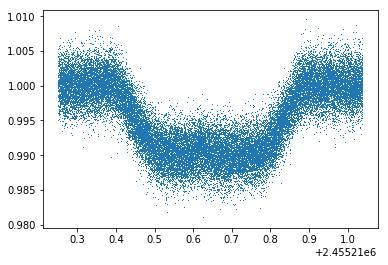

In [5]:
plt.plot(jd, flux, ',')

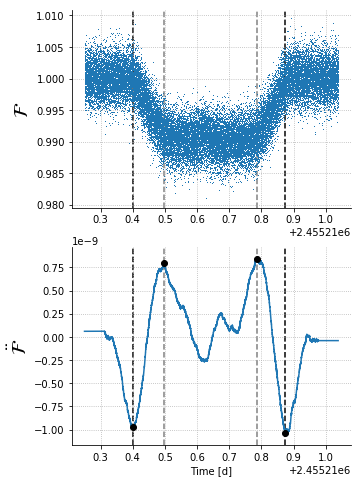

In [9]:
from scipy.signal import savgol_filter

filtered = savgol_filter(flux, 5001, 2, deriv=2)

times = jd
all_fluxes = flux

fig, ax = plt.subplots(2, 1, figsize=(5, 8))
# ax[0].plot(times, spotless_lc, label='Spotless')
# ax[0].plot(times, spotted_lc, label='Spotted')
ax[0].plot(times, all_fluxes, ',', rasterized=True)

from scipy.signal import savgol_filter

n = len(times)//2
mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]

ax[1].plot(times, filtered)

t14 = -1*np.diff(times[mins])[0]
t23 = -1*np.diff(times[maxes])[0]

ax[1].scatter(times[mins], filtered[mins], color='k', zorder=10)
ax[1].scatter(times[maxes], filtered[maxes], color='k', zorder=10)

for ts, c in zip([times[mins], times[maxes]], ['k', 'gray']):
    for t in ts:
        ax[0].axvline(t, ls='--', color=c, zorder=-10)
        ax[1].axvline(t, ls='--', color=c, zorder=-10)

for axis in fig.axes:
    axis.grid(ls=':')
    for s in ['right', 'top']:
        axis.spines[s].set_visible(False)
    axis.legend()
        
ax[0].set_ylabel('$\mathcal{F}$', fontsize=20)
ax[1].set_ylabel('$\ddot{\mathcal{F}}$', fontsize=20)
ax[1].set_xlabel('Time [d]')
fig.savefig('hd80606.pdf', bbox_inches='tight')
plt.show()

In [10]:
one_plus_k = np.sqrt((np.sin(t14*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
one_minus_k = np.sqrt((np.sin(t23*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
k = (one_plus_k - one_minus_k)/2
print(k, params.rp)

0.198560042791 0.1001


0.0830061372105 0.00728445669657


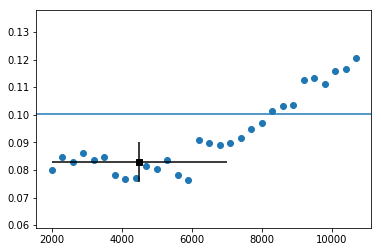

In [11]:
ws = []
ks = []

for w in np.arange(2001, 11001, 300):
    filtered = savgol_filter(all_fluxes, w, 2, deriv=2)
    n = len(times)//2
    mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
    maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]
    t14 = -1*np.diff(times[mins])[0]
    t23 = -1*np.diff(times[maxes])[0]
    
    eccentricity_term = np.sqrt(1 - params.ecc**2)/(1 + params.ecc * np.sin(np.radians(params.w)))
    
    one_plus_k = np.sqrt((np.sin(t14*np.pi/params.per/eccentricity_term) * np.sin(np.radians(params.inc)) * params.a)**2 + 
                         params.b**2)
    one_minus_k = np.sqrt((np.sin(t23*np.pi/params.per/eccentricity_term) * np.sin(np.radians(params.inc)) * params.a)**2 + 
                          params.b**2)
    k = (one_plus_k - one_minus_k)/2

    ws.append(w)
    ks.append(k)

ws = np.array(ws)
ks = np.array(ks)

plt.scatter(ws, ks)

wmid = 4500
k = np.median(ks[(ws < 7000) & (ws >= 2000)])
kerr = np.ptp(ks[(ws < 7000) & (ws >= 2000)])/2
plt.errorbar(wmid, k, yerr=kerr, xerr=2500, fmt='s', color='k')
plt.axhline(params.rp)
print(k, kerr)
# plt.ylim([0, 0.25])

In [13]:
w = 8001
filtered = savgol_filter(all_fluxes, w, 2, deriv=2)
n = len(times)//2
mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]
t14 = abs(np.diff(times[mins])[0])
t23 = abs(np.diff(times[maxes])[0])
one_plus_k = np.sqrt((np.sin(t14*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
one_minus_k = np.sqrt((np.sin(t23*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
k = (one_plus_k - one_minus_k)/2

(t14 - t23) * len(times) / times.ptp()

8995.9895405839561